## Titanic - Machine Learning from Disaster

### 1. 데이터 확인하기

In [119]:
import pandas as pd

titanic_df = pd.read_csv('./titanic_train.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
type(titanic_df)

pandas.core.frame.DataFrame

In [121]:
titanic_df.shape

(891, 12)

In [122]:
# 학습 데이터 정보
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
# 결손값 확인
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2. 데이터 전처리
#### 결손값 처리

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'

#### Age는 평균값으로, Cabin과 Embarked는 N으로 채워준다.

In [126]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

In [127]:
print('데이터 세트 Null값 개수: ', titanic_df.isnull().sum().sum())

데이터 세트 Null값 개수:  0


#### feature별 값 분포 확인

In [128]:
print('Sex값 분포:\n', titanic_df['Sex'].value_counts())
print('\nCabin값 분포:\n', titanic_df['Cabin'].value_counts())
print('\nEmbarked값 분포: \n', titanic_df['Embarked'].value_counts())

Sex값 분포:
 male      577
female    314
Name: Sex, dtype: int64

Cabin값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [129]:
# Cabin의 앞의 알파벳만 가져오기
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [130]:
# 객실 등급 별 인원 확인
titanic_pclass = titanic_df['Pclass']
titanic_pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### 학습에 사용할 columns 확인하기

In [131]:
titanic_df.head()
# Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Cabin, Embarked만 학습에 사용하면 될 듯 하다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


### 3. 통계를 통한 주요 피처 검증

#### Sex 별 생존 결과

In [132]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

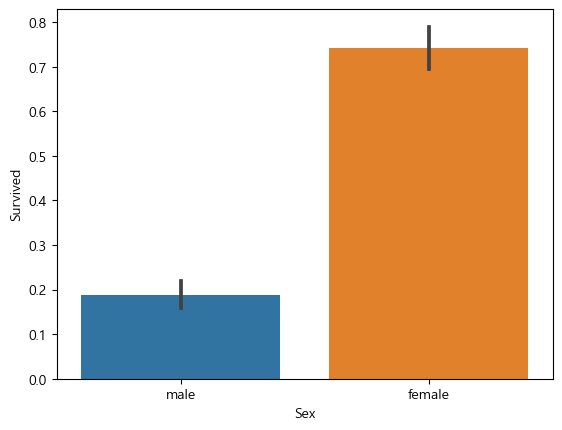

In [133]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

#### Pclass별 생존 결과

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

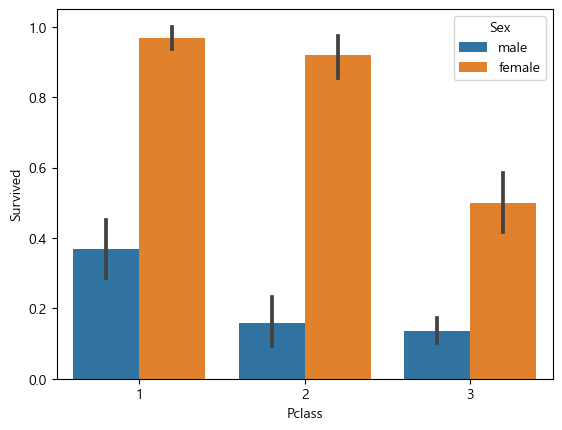

In [134]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
# 세부집단 시각화 hue

#### Age별 생존 결과

In [135]:
# 연령대 별 생존결과를 확인하기 위해 Age_Area 설정해주는 함수 생성
def age(n):
    if n < 10:
        return '유아'
    elif 10 < n < 60:
        return str(int(n//10)) + '0대'
    else:
        return '노인'

titanic_df['Age_Area'] = titanic_df['Age'].apply(age)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Area
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,20대
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,30대
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,20대
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,30대
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,30대


<AxesSubplot: xlabel='Age_Area', ylabel='Survived'>

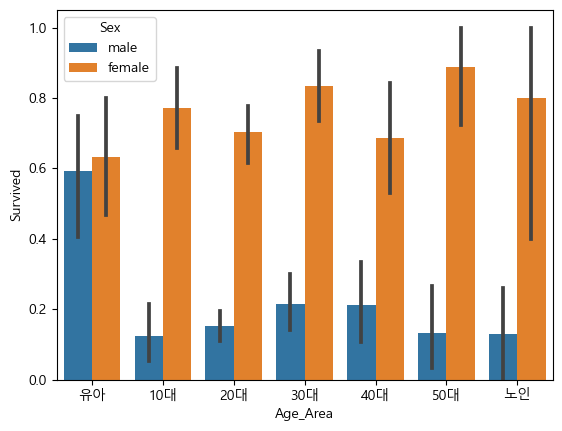

In [136]:
group_names = ['유아', '10대', '20대', '30대', '40대', '50대', '노인']
sns.barplot(x='Age_Area', y='Survived', hue='Sex', data=titanic_df, order=group_names)

#### SibSp/Parch별 생존 결과

<AxesSubplot: xlabel='SibSp', ylabel='Survived'>

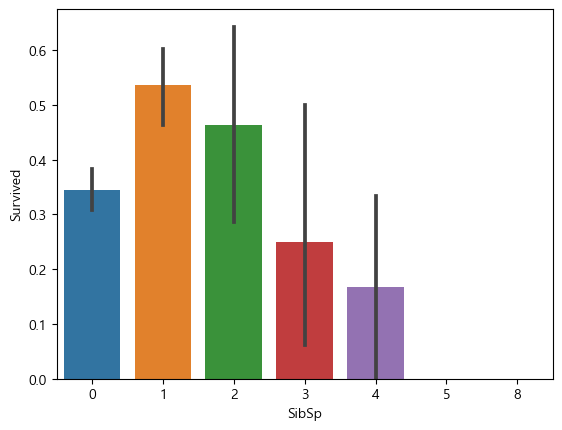

In [137]:
sns.barplot(x='SibSp', y='Survived', data=titanic_df)
# 형제/자매가 많을수록 생존율이 떨어진다

<AxesSubplot: xlabel='Parch', ylabel='Survived'>

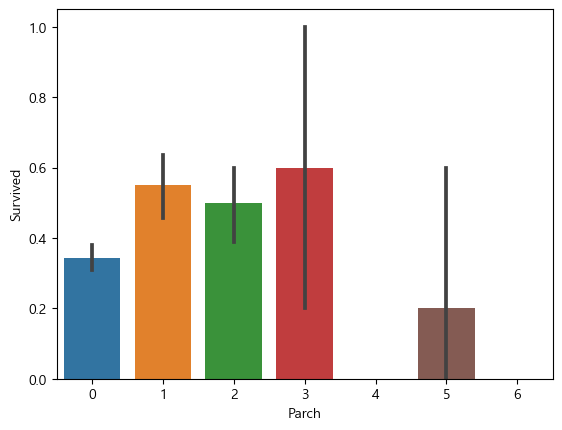

In [138]:
sns.barplot(x='Parch', y='Survived', data=titanic_df)
# 부모, 자식이 많을수록 생존율이 떨어진다

#### Fare에 따른 생존 결과

In [139]:
# 요금이 다양하므로 최댓값과 최솟값을 찾아 범위를 지정해주자
print(titanic_df['Fare'].min())
print(titanic_df['Fare'].max())

0.0
512.3292


In [140]:
# fare 범위에 따라 분리하기 위한 함수 생성
def fare(n):
    if n == 0:
        return '0'
    elif n < 100:
        return 'under 100'
    elif n < 200:
        return 'under 200'
    elif n < 300:
        return 'under 300'
    elif n < 400:
        return 'under 400'
    else:
        return 'over 400'

In [141]:
titanic_df['Fare_Area'] = titanic_df['Fare'].apply(fare)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Area,Fare_Area
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,20대,under 100
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,30대,under 100
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,20대,under 100
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,30대,under 100
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,30대,under 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,20대,under 100
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,10대,under 100
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,20대,under 100
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,20대,under 100


<AxesSubplot: xlabel='Fare_Area', ylabel='Survived'>

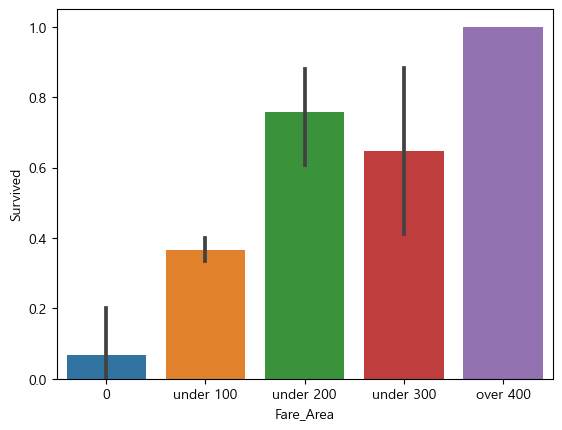

In [142]:
group_names_fare = ['0', 'under 100', 'under 200', 'under 300', 'over 400']
sns.barplot(x='Fare_Area', y='Survived', data=titanic_df, order=group_names_fare)
# 요금이 높을수록 생존율이 높다

#### Embarked에 따른 생존결과

In [143]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

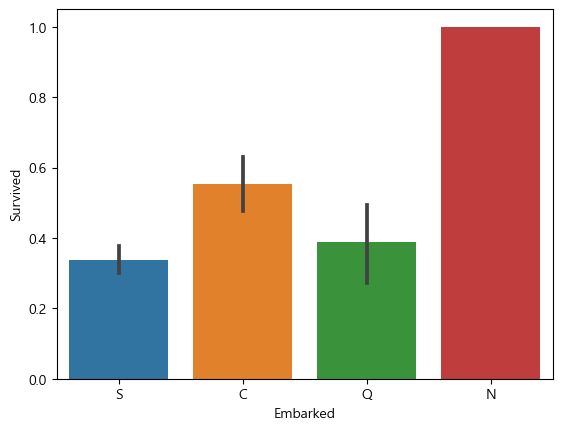

In [144]:
sns.barplot(x='Embarked', y='Survived', data=titanic_df)

### 4. 피처 인코딩

In [7]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


#### 지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 만들자!

In [8]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝에 필요없는 피처들 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [9]:
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)

x_titanic_df = transform_features(x_titanic_df)
x_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

dt_clf.fit(X_train, Y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(Y_test, dt_pred)))

rf_clf.fit(X_train, Y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(Y_test, rf_pred)))

lr_clf.fit(X_train, Y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(Y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


### *캐글에 제출할 csv파일 만들기(with `test.csv`)
- LogisticRegression의 정확도가 가장 높으므로, 이를 적용시켜 캐글에 제출할 csv를 만들어보자

In [102]:
# 테스트에 사용할 csv파일을 불러오고, 
test_df = pd.read_csv('./test.csv')
test_df = transform_features(test_df)

# 정답이 될 gender_submission을 불러온다
submission_df = pd.read_csv('./gender_submission.csv')

In [104]:
# 정답이 될 column 확인
submission_df['Survived']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [100]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.50000,0,0,7.8292,7,1
1,3,0,47.00000,1,0,7.0000,7,2
2,2,1,62.00000,0,0,9.6875,7,1
3,3,1,27.00000,0,0,8.6625,7,2
4,3,0,22.00000,1,1,12.2875,7,2
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,7,2
414,1,0,39.00000,0,0,108.9000,2,0
415,3,1,38.50000,0,0,7.2500,7,2
416,3,1,30.27259,0,0,8.0500,7,2


In [85]:
x_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


### test_df에 모델 적용

In [149]:
# DecisionTree
dt_clf.fit(X_train, Y_train)
dt_pred = dt_clf.predict(test_df)
accuracy_score(submission_df['Survived'], dt_pred)

0.7464114832535885

In [150]:
# RandomForest
rf_clf.fit(X_train, Y_train)
rf_pred = rf_clf.predict(test_df)
accuracy_score(submission_df['Survived'], rf_pred)

0.8181818181818182

In [151]:
# LogisticRegression
lr_clf.fit(X_train, Y_train)
lr_pred = lr_clf.predict(test_df)
accuracy_score(submission_df['Survived'], lr_pred)

0.9688995215311005

In [152]:
predict = lr_clf.predict(test_df)
predict = np.array(predict).flatten().tolist()

submission = pd.DataFrame({
    'PassengerId' : submission_df['PassengerId'],
    'Survived': predict
})

submission.to_csv('submission_titanic.csv', index=False)
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [117]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []

    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        X_train, X_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        Y_train, Y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(X_train, Y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(Y_test, predictions)
        scores.append(accuracy)
        print('교차검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))

exec_kfold(dt_clf, folds=5)


교차검증 0 정확도: 0.7542
교차검증 1 정확도: 0.7809
교차검증 2 정확도: 0.7865
교차검증 3 정확도: 0.7697
교차검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차검증 0 정확도: 0.7430
교차검증 1 정확도: 0.7753
교차검증 2 정확도: 0.7921
교차검증 3 정확도: 0.7865
교차검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [17]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 5, 8]
}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, Y_train)

print('GridSearchCV 최적 파라미터: ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

GridSearchCV 최적 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992


In [20]:
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(Y_test, dpredictions)
precision = precision_score(Y_test, dpredictions)
recall = recall_score(Y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))
print('정밀도: {0:.4f}'.format(precision))
print('재현율: {0:.4f}'.format(recall))

테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715
정밀도: 0.8393
재현율: 0.7705
